In [71]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler


fn = r'..\data\RawMLData.json'


def get_data(fn):

    with open(fn) as f:
        d = json.load(f)

    df = pd.DataFrame(d)


    numpycols = ['cP', 'HO','AO']

    for col in numpycols:
        
        df[col] = df[col].apply(lambda x: np.array(x, dtype = np.float32))

        if col != 'cP': # TODO: this has normalized the cols
            df[col] = df[col].apply(lambda x: x/np.max(x))  
        


    cat_cols = ['Cohort', 'Device']
    for col in cat_cols:
        df[col] = df[col].astype('category')

    df['systolicP'] = df['InvP'].apply(lambda x: x[0]).astype(np.float32)
    df['meanP'] = df['InvP'].apply(lambda x: x[1]).astype(np.float32)
    df['diastolicP'] = df['InvP'].apply(lambda x: x[2]).astype(np.float32)

    print(df.info())


    return df

df = get_data(fn)
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cP          231 non-null    object  
 1   HO          231 non-null    object  
 2   AO          231 non-null    object  
 3   Device      231 non-null    category
 4   InvP        231 non-null    object  
 5   ID          231 non-null    object  
 6   Cohort      231 non-null    category
 7   systolicP   231 non-null    float32 
 8   meanP       231 non-null    float32 
 9   diastolicP  231 non-null    float32 
dtypes: category(2), float32(3), object(5)
memory usage: 12.6+ KB
None
                                                  cP  \
0  [208.89467, 205.89714, 203.43088, 200.66885, 1...   
1  [190.27066, 187.09329, 184.71638, 182.33327, 1...   
2  [218.12044, 215.04482, 212.68332, 210.1684, 20...   
3  [217.4349, 214.32487, 211.6698, 208.97379, 205...   
4  [143.55525, 136.84154, 133.02698, 128

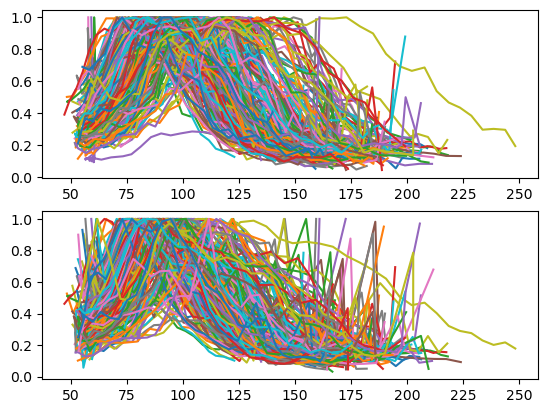

In [72]:
fig, ax = plt.subplots(2, 1)



for idx in df.index:
    ax[0].plot(df.loc[idx, 'cP'], df.loc[idx, 'HO'])
    ax[1].plot(df.loc[idx, 'cP'], df.loc[idx, 'AO'])





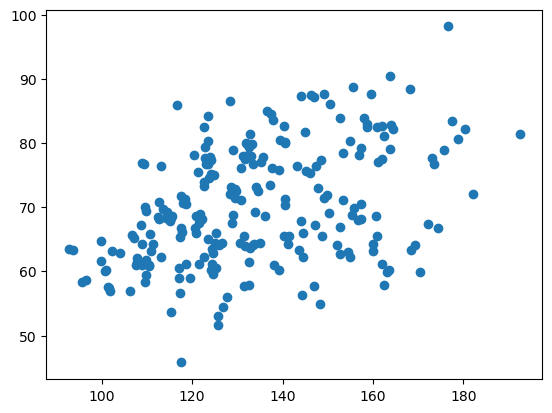

In [73]:
fig, ax = plt.subplots()

ax.scatter(df['systolicP'], df['diastolicP'])

In [74]:
df

,cP,HO,AO,Device,InvP,ID,Cohort,systolicP,meanP,diastolicP
0,"[208.89467, 205.89714, 203.43088, 200.66885, 1...","[0.18349579, 0.20695925, 0.21018845, 0.2096005...","[0.16699372, 0.17469639, 0.16839084, 0.1752412...",ML,"[161, 113.5, 82.5]",c010510d,Training,161.000000,113.500000,82.500000
1,"[190.27066, 187.09329, 184.71638, 182.33327, 1...","[0.18525277, 0.2111898, 0.20398892, 0.23433243...","[0.15172814, 0.1580123, 0.16804188, 0.18023252...",ML,"[162.1, 113.4, 82.7]",c010510d,Training,162.100006,113.400002,82.699997
2,"[218.12044, 215.04482, 212.68332, 210.1684, 20...","[0.13955748, 0.15184195, 0.18665355, 0.1938017...","[0.12820403, 0.1376975, 0.15532331, 0.16536213...",ML,"[155, 106.9, 80.3]",c010510d,Training,155.000000,106.900002,80.300003
3,"[217.4349, 214.32487, 211.6698, 208.97379, 205...","[0.18319076, 0.17881706, 0.18840063, 0.1953559...","[0.15525477, 0.15858383, 0.15016752, 0.1635287...",ML,"[157.3, 106.9, 79.3]",c010510d,Training,157.300003,106.900002,79.300003
4,"[143.55525, 136.84154, 133.02698, 128.74353, 1...","[0.1522373, 0.21913016, 0.20524718, 0.27426967...","[0.36795923, 0.18180482, 0.1499484, 0.20261654...",ML,"[129.6, 96.7, 72.6]",c010610d,Training,129.600006,96.699997,72.599998
...,...,...,...,...,...,...,...,...,...,...
226,"[164.643, 160.93803, 157.06279, 153.25061, 149...","[0.19319688, 0.23232621, 0.30102718, 0.2897283...","[0.30756605, 0.18393573, 0.1536503, 0.23323247...",OM,"[146.9, 95.1, 57.7]",c060908d,Testing,146.899994,95.099998,57.700001
227,"[165.47702, 163.5828, 162.61423, 159.4422, 155...","[0.51164573, 0.14487663, 0.144769, 0.14959052,...","[0.5429743, 0.11790762, 0.10129728, 0.199661, ...",OM,"[134.6, 95.4, 72.5]",c061608d,Testing,134.600006,95.400002,72.500000
228,"[202.65152, 202.66925, 190.08665, 185.06488, 1...","[0.2928868, 0.1396209, 0.16270521, 0.1771964, ...","[0.2988232, 0.78643566, 0.14892963, 0.12937233...",OM,"[163.8, 113.7, 79.1]",c061708d,Testing,163.800003,113.699997,79.099998
229,"[175.2689, 170.64056, 166.15529, 161.63652, 15...","[0.21113521, 0.15493707, 0.20964195, 0.1886944...","[0.21354666, 0.15922709, 0.15311341, 0.173026,...",OM,"[147.4, 100.9, 76.4]",c061708d,Testing,147.399994,100.900002,76.400002


In [75]:
df_flat = df.explode(['cP', 'HO', 'AO']).drop(columns = ['InvP',])
print(df_flat)

             cP        HO        AO Device        ID    Cohort   systolicP  \
0    208.894669  0.183496  0.166994     ML  c010510d  Training  161.000000   
0    205.897141  0.206959  0.174696     ML  c010510d  Training  161.000000   
0    203.430878  0.210188  0.168391     ML  c010510d  Training  161.000000   
0    200.668854    0.2096  0.175241     ML  c010510d  Training  161.000000   
0      197.5849  0.221747  0.180575     ML  c010510d  Training  161.000000   
..          ...       ...       ...    ...       ...       ...         ...   
230   67.488327   0.41517  0.371893     OM  c061908d   Testing  133.899994   
230     63.2757  0.430314  0.409846     OM  c061908d   Testing  133.899994   
230   59.722836   0.35153  0.348832     OM  c061908d   Testing  133.899994   
230    56.27636  0.368976  0.384194     OM  c061908d   Testing  133.899994   
230   53.214085    0.2145  0.248814     OM  c061908d   Testing  133.899994   

     meanP  diastolicP  
0    113.5   82.500000  
0    113.5   

In [95]:
# FIT THE MODEL


#scaler= MinMaxScaler()
#scaler=StandardScaler()

scalerX = RobustScaler()
scalerY=RobustScaler()

# x_vars = ['HO', 'AO', 'cP']
# y_vars = ['systolicP', 'meanP', 'diastolicP', ]

x_vars = ['systolicP', 'meanP', 'diastolicP', 'cP']
y_vars = ['HO', 'AO']


scalerX.fit(df_flat[x_vars])
scalerY.fit(df_flat[y_vars])

df_flat_normalized = df_flat.copy()
df_flat_normalized[x_vars] = scalerX.transform(df_flat[x_vars])
df_flat_normalized[y_vars] = scalerY.transform(df_flat[y_vars])


I_train = df_flat_normalized['Cohort'] == 'Training'

x_train = df_flat_normalized.loc[I_train, x_vars]
y_train = df_flat_normalized.loc[I_train, y_vars]

x_test = df_flat_normalized.loc[~I_train, x_vars]
y_test = df_flat_normalized.loc[~I_train, y_vars]


from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=1000,n_jobs=-1,verbose =0)
model.fit(x_train, y_train)


# from sklearn.neural_network import MLPRegressor
# model=MLPRegressor(hidden_layer_sizes=(500,100, 100),learning_rate='adaptive',max_iter=1000)
# model.fit(x_train, y_train)

y_predict_train = model.predict(x_train)
y_predict_test = model.predict(x_test)

print('done fitting')


done fitting


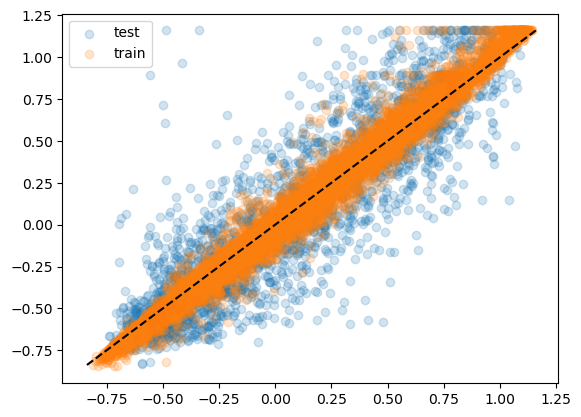

In [96]:
fig, ax = plt.subplots()
ax.scatter(y_predict_test, y_test, label = 'test', alpha = .2)
ax.scatter(y_predict_train, y_train, label = 'train', alpha = .2)

lims = (np.max(y_train), np.min(y_train))

ax.plot(lims,lims, c ='k', label =None, linestyle = '--')

ax.legend()

(array([5.79130960e-03, 1.44782740e-03, 7.23913700e-03, 4.05391672e-02,
        3.37343784e-01, 1.23210112e+00, 1.62011886e+00, 3.74987297e-01,
        6.51522330e-02, 1.01347918e-02]),
 array([-1.64469786, -1.37405129, -1.10340471, -0.83275813, -0.56211156,
        -0.29146498, -0.0208184 ,  0.24982817,  0.52047475,  0.79112133,
         1.06176791]),
 <BarContainer object of 10 artists>)

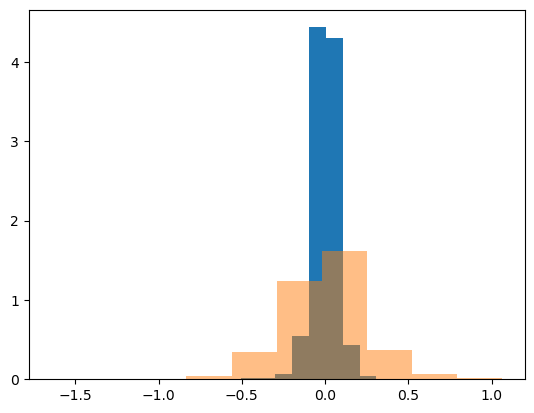

In [97]:
fig, ax = plt.subplots(1, 1)

e_train = y_predict_train- y_train
e_test = y_predict_test-y_test

e_train = np.array(e_train).flatten()
e_test = np.array(e_test).flatten()

ax.hist(e_train, density = True)
ax.hist(e_test, density = True, alpha=.5)

array([[ 0.89032278,  1.10062883,  0.91034462,  1.65676403],
       [ 0.89032278,  1.10062883,  0.91034462,  1.60712971],
       [ 0.89032278,  1.10062883,  0.91034462,  1.5662923 ],
       ...,
       [ 0.01612903, -0.2515723 ,  0.        , -0.81328547],
       [ 0.01612903, -0.2515723 ,  0.        , -0.87035366],
       [ 0.01612903, -0.2515723 ,  0.        , -0.92106008]])

In [101]:
df_flat

y = scalerY.inverse_transform(model.predict(scalerX.transform(df_flat[x_vars])))

for i,var in enumerate(y_vars):
    df_flat[f'pred_{var}'] = y[:, i]

print(df_flat.info())

c:\Users\ssmee\.conda\envs\BP\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
Index: 6642 entries, 0 to 230
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cP          6642 non-null   object  
 1   HO          6642 non-null   object  
 2   AO          6642 non-null   object  
 3   Device      6642 non-null   category
 4   ID          6642 non-null   object  
 5   Cohort      6642 non-null   category
 6   systolicP   6642 non-null   float32 
 7   meanP       6642 non-null   float32 
 8   diastolicP  6642 non-null   float32 
 9   pred_HO     6642 non-null   float64 
 10  pred_AO     6642 non-null   float64 
dtypes: category(2), float32(3), float64(2), object(4)
memory usage: 454.3+ KB
None


In [113]:
['pred_'+y for y in y_vars]

['pred_HO', 'pred_AO']

                  cP        HO        AO Device    Cohort   systolicP  \
ID                                                                      
c010510d  132.136142  0.490364  0.396411     ML  Training  158.544571   
c010610d   99.350878  0.519123  0.467018     ML  Training  120.363907   
c011210d  105.854418  0.636859  0.543642     ML  Training  138.116302   
c011210e  108.600787  0.541372  0.541882     ML  Training  131.442978   
c011708d  112.597584  0.280258  0.272672     OM   Testing  122.500000   

               meanP  diastolicP   pred_HO   pred_AO  
ID                                                    
c010510d  109.819176   81.049225  0.486256  0.402613  
c010610d   91.082474   71.364937  0.521797  0.454962  
c011210d  101.650009   76.880432  0.631077  0.515169  
c011210e   93.085983   69.245789  0.535858  0.525749  
c011708d  100.300003   82.500000  0.269615  0.244311  


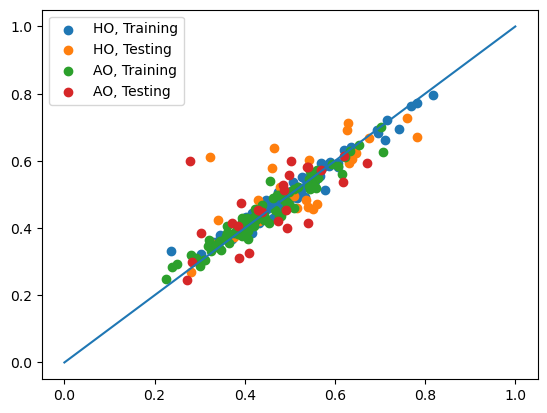

In [117]:
def agg_analysis(df):

    d = {}

    for var in df.columns:

        if var in y_vars + ['pred_'+y for y in y_vars]:
            d[var] = np.median(df[var])

        elif var in x_vars:
            d[f'{var}'] = np.mean(df[var])

        else:
            tmp = set(df[var])
            assert len(tmp)==1, print(var, set(df[var]))
            d[var] = list(tmp)[0]

    return pd.Series(d)

df_agg = df_flat.groupby('ID').apply(agg_analysis, include_groups=False)
df_agg = pd.DataFrame(df_agg)
print(df_agg.head())

fig, ax = plt.subplots()

for var in y_vars:
    for split in ['Training', 'Testing']:
        I = df_agg['Cohort'] == split
        ax.scatter(df_agg.loc[I, var], df_agg.loc[I, f'pred_{var}'], label = f'{var}, {split}')

ax.legend()

ax.plot([0, 1], [0, 1])

In [120]:

e_train = y_predict_train- y_train
e_test = y_predict_test-y_test


def analyze(e):
    print(np.mean(e, axis = 0))
    print(np.std(e, axis = 0))

analyze(e_train)
analyze(e_test)


HO   -0.000401
AO   -0.000647
dtype: float64
HO    0.061936
AO    0.077656
dtype: float64
HO    0.007349
AO   -0.008737
dtype: float64
HO    0.226027
AO    0.267719
dtype: float64
